<a href="https://colab.research.google.com/github/dhenifferraujo/Machine-Learning/blob/main/Recomendacao_filme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aqui eu importei a biblioteca tensorflow e dei um "apelido" para ela de 'tf'
import tensorflow as tf

In [ ]:
#Criação do modelo sequencial
#O modelo sequencial permite inserir camadas em série, onde o output da primeira camada serve como input da segunda, e assim por diante.
rede = tf.keras.models.Sequential()

In [ ]:
#Adicionando camadas densas (totalmente conectadas). A seguir estou colocando o endereço delas, assim como as suas características.
#Units são os neurônios, input_shape são as entradas, activation é a função de ativação.
#A função de ativação decide se um neurônio da camada é disparado ou não. 
#"input_shape(19,)". Nesse caso, a vírgula é necessária depois do 19, porque se tem apenas uma dimensão. 
#Usa-se a função "add" para adicionar camadas na rede, cada camada é do tipo "dense". 
rede.add(tf.keras.layers.Dense(units=10, input_shape=(19,),activation='sigmoid')) #Essa é a primeira camada
rede.add(tf.keras.layers.Dense(units=16, activation='sigmoid')) #Não precisei dizer quantas entradas essa segunda camada tem, porque ela já vai usar as 10 entradas da camada anterior automaticamente
rede.add(tf.keras.layers.Dense(units=6, activation='softmax')) #Terceira camada

In [ ]:
#Aprendizado de redes neurais
#A compilação serve para validar e finalizar a estrutura da rede neural. Ela recebe 3 parâmetros: loss, optmizer e metrics.
#Optimizer: define como os pesos da rede neural são atualizados.
#loss: calcula a diferença entre os dados de teste e os dados de validação.
#metrics: são as métricas que devem ser guardadas para avaliação. 
rede.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics='accuracy')

In [ ]:
#Treinamento, Resultados e Validação
#Para chamar algum arquivo no código, primeiro tenho que importar a biblioteca Pandas e depois criar uma tabela
#usando uma função de leitura CSV
import pandas as pd
tabela = pd.read_csv('filmes.csv')
tabela



,Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),The Usual Suspects (1995),Braveheart (1995),Apollo 13 (1995),Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),The Shawshank Redemption (1994),Forrest Gump (1994),The Fugitive (1993),Jurassic Park (1993),Schindler's List (1993),Terminator 2: Judgment Day (1991),Batman (1989),The Silence of the Lambs (1991),Independence Day (a.k.a. ID4) (1996),Star Wars: Episode V - The Empire Strikes Back (1980),The Matrix (1999),American Beauty (1999),Star Wars: Episode VI - Return of the Jedi (1983)
0,4.0,5.0,4.0,5.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0
1,4.0,4.0,3.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,4.0
2,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,4.0,4.0,4.0,5.0
3,4.0,3.0,5.0,4.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,4.0
4,4.0,3.0,4.0,3.0,5.0,4.0,5.0,4.0,1.0,5.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,3.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,3.0,4.0,5.0,5.0,2.0,4.0
2835,1.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,0.0,5.0,4.0,4.0,3.0,3.0,5.0,4.0,5.0,5.0,3.0,5.0
2836,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,4.0,3.0,5.0,4.0,5.0,4.0
2837,3.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,3.0,5.0,3.0,4.0,4.0,4.0,4.0


In [ ]:
#Essa rede só consegue receber informação em formato de array, então tenho que pegar essa tabela e passar para o formato de array. 
#a função que faz isso é a "to_numpy()"
banco = tabela.to_numpy()
banco

array([[4., 5., 4., ..., 5., 5., 3.],
       [4., 4., 3., ..., 3., 4., 4.],
       [3., 4., 4., ..., 4., 4., 5.],
       ...,
       [5., 5., 5., ..., 4., 5., 4.],
       [3., 4., 5., ..., 4., 4., 4.],
       [5., 5., 4., ..., 5., 3., 5.]])

In [ ]:
#Agora eu tenho que criar as perguntas e respostas "x = perguntas e y = respostas"
x = banco[:,0:19] #No colchete entra com as linhas que quer, uma vírgula e depois as colunas
y = banco[:,19] #Eu quero todas as linhas p/ x e y. Para representar isso eu coloco ": (dois pontos)

from sklearn.model_selection import train_test_split #separando o banco em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
#Aqui é como se eu colocasse a rede sem estudar para fazer a prova, pra ver como ela se sai. Para isso vou usar a função 'evaluate'
#Com a métrica acurácia dá pra ver que ela só tá acertando pouco mais de 30% da prova, ou seja, ela está chutando as respostas.
rede.evaluate(x_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 1.6985 - accuracy: 0.2192


[1.7040894031524658, 0.22359155118465424]

In [ ]:
#Na função anterior ficou claro que a rede precisa estudar, para isso vou dar para ela a 'lista de exercícios' (x_train e y_train), o número de vezes que ela irá fazer essa lista, 
#e por último irei dar o x_teste e y_test como forma de avaliação da rede
#A função fit retorna um histórico de métricas. Com isso posso verificar a precisão de nosso algoritmo
r = rede.fit(x_train, y_train, epochs = 150, validation_data=(x_test, y_test))

Epoch 1/150
71/71 [==============================] - 1s 3ms/step - loss: 1.4942 - accuracy: 0.4179 - val_loss: 1.3277 - val_accuracy: 0.5000
Epoch 2/150
71/71 [==============================] - 0s 2ms/step - loss: 1.3144 - accuracy: 0.4606 - val_loss: 1.2637 - val_accuracy: 0.5000
Epoch 3/150
71/71 [==============================] - 0s 2ms/step - loss: 1.2841 - accuracy: 0.4606 - val_loss: 1.2455 - val_accuracy: 0.5000
Epoch 4/150
71/71 [==============================] - 0s 2ms/step - loss: 1.2744 - accuracy: 0.4606 - val_loss: 1.2371 - val_accuracy: 0.5000
Epoch 5/150
71/71 [==============================] - 0s 2ms/step - loss: 1.2692 - accuracy: 0.4606 - val_loss: 1.2337 - val_accuracy: 0.5000
Epoch 6/150
71/71 [==============================] - 0s 2ms/step - loss: 1.2647 - accuracy: 0.4606 - val_loss: 1.2313 - val_accuracy: 0.5000
Epoch 7/150
71/71 [==============================] - 0s 2ms/step - loss: 1.2604 - accuracy: 0.4606 - val_loss: 1.2267 - val_accuracy: 0.5000
Epoch 8/150
7

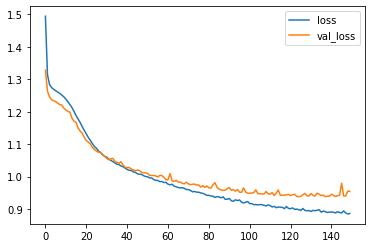

In [ ]:
#Em cada linha eu consigo ver duas acurácias, uma de treino e uma de teste
#Para visualizar a evolução, irei fazer dois gráficos, para isso vou utilizar uma biblioteca do python chamada 'matplotlib'
#A linha azul mostra a evolução do treino e a laranja a do teste em cada uma das iterações
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

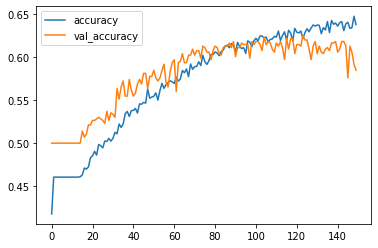

In [ ]:
#No segundo gráfico eu posso visualizar a evolução da acurácia nos testes e nas provas
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
#Aqui eu coloquei as notas que eu daria para esses filmes
rede.predict(np.array([[5,5,2,5,2,3,5,3,5,3,4,2,4,4,5,2,3,5,5]])).argmax(axis=1)

array([3])